In [119]:
"""
Models Air pollution to the GDP, because you are rich and clean, so go buy TSLA.
"""

'\nModels Air pollution to the GDP, because you are rich and clean, so go buy TSLA.\n'

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn.linear_model
import sklearn.neighbors

#get the data
f = open("../data/airpoll.csv")
data = f.readlines()
apv = []
cs = []
gdp = []

for r in range(1, len(data)):
    c = data[r].split(",")[0].replace('"', '')
    if c not in ['BRA', 'EST', 'ZAF', 'COL']:
        cs.append(data[r].split(",")[0].replace('"', ''))
        apv.append(int(data[r].split(",")[14]))
f.close()

f = open("../data/gdp.csv")
data = f.readlines()
for r in range(1, len(data)):
    gdp.append(math.floor(float(data[r].split(",")[6])))

f.close()
gdp = np.array(gdp)
apv = np.array(apv)
cs = np.array(cs)
print(apv)
print(cs)
print(gdp)


[ 5 16 15  7 20  9  6 13 14 18 19  3  7 18 14 28 12 16 14  5  5 22 10 21
 11  6 15 20 11 10 16 21 11 15 16 14 14]
['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'CHL' 'ISR' 'LVA' 'RUS' 'SVN' 'OECD'
 'LTU']
[ 50284  52614  48610  46480  35880  51961  44929  42853  50564  27823
  27699  53031  72017  39922  39990  39566 110249  19506  52284  39906
  58917  27947  31604  29651  37309  50433  65720  26509  44138  57884
  22624  31228  37855  33875  42862  26407  30924]


Text(0, 0.5, 'Air Pollution (Micrograms per cubic meter)')

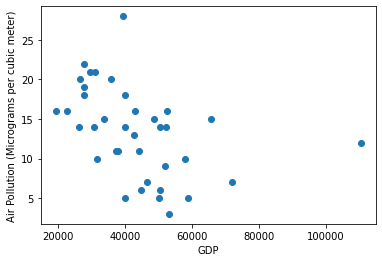

In [118]:
plt.scatter(gdp, apv)
plt.xlabel('GDP')
plt.ylabel('Air Pollution (Micrograms per cubic meter)')

In [193]:
#new linear regression model
lrm = sklearn.linear_model.LinearRegression()
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [194]:
gdp = gdp.reshape(-1,1)
apv = apv.reshape(-1,1)

In [195]:
#train the model
lrm.fit(gdp, apv)
knn.fit(gdp, apv)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

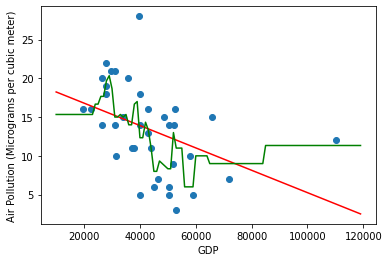

In [197]:
newys = []
newxs = []


for i in range(10000, 120000, 1000):
    newxs.append(i)
    
newxs = np.array(newxs).reshape(-1, 1)

for i in newxs:    
    newys.append(lrm.predict(i.reshape(-1,1))[0][0])

kx = []
ky = []

for i in range(10000, 120000, 1000):
    kx.append(i)
    
kx = np.array(kx).reshape(-1, 1)

for i in kx:    
    ky.append(knn.predict(i.reshape(-1,1))[0][0])

    

#boom

plt.scatter(gdp, apv)
plt.xlabel('GDP')
plt.ylabel('Air Pollution (Micrograms per cubic meter)')
plt.plot(newxs, newys, color='red')
plt.plot(kx, ky, color='green')

In [ ]:
#test

